# Chapter 6. Techniques (about training)

- Momentum : Taking previous updating information to current updates to accelerate the training.

- AdaGrad : Decaying learning rate (parameter-wise decaying) => Largely updated parameters are less changed at the next update.

- Adam : https://arxiv.org/pdf/1412.6980v8.pdf

In [1]:
def f(x, y):
    return  0.05 * x**2  + y**2


def df(x, y):
    return 0.1 * x, 2.0 * y

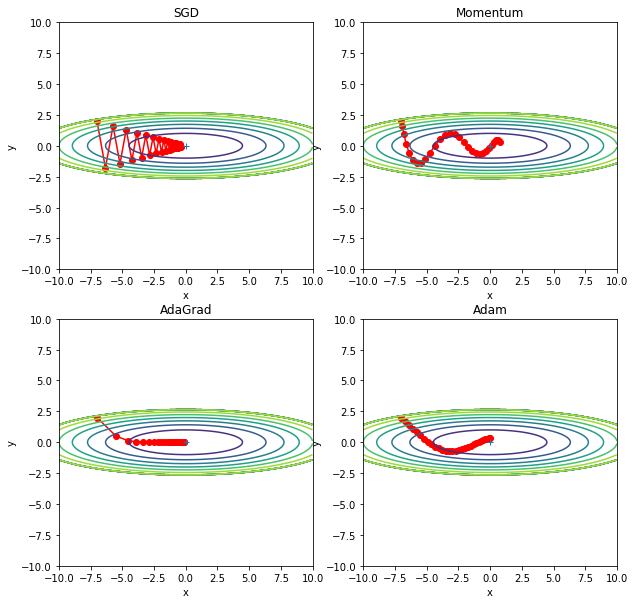

In [2]:
import numpy as np
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

# SGD, Momentum, AdaGrad, Adam
from common.optimizer import *

optimizers = OrderedDict()

optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)


init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

idx = 1

plt.figure(figsize=(10,10))

for key in optimizers.keys():
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    mask = Z > 7
    Z[mask] = 0

    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()